In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from scipy import linalg
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from umap import UMAP

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)
I = fetch_olivetti_faces().images

In [3]:
def t_sne():
    s = StandardScaler().fit_transform(X)


    pca = PCA(n_components=50)
    principalComponents = pca.fit_transform(s)


    tsne = TSNE(n_components=2,verbose=1, perplexity=7,init='random',learning_rate=200,n_iter=1000)


    X_embedded = tsne.fit_transform(principalComponents)

    ax = plt.gca()
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)

    plt.gray()
    for i in range(400):
        plt.imshow(I[i],extent=(X_embedded[i][0]-1.5,X_embedded[i][0]+1.5,X_embedded[i][1]-1.5,X_embedded[i][1]+1.5),interpolation='none', cmap='gray')
    plt.grid(None)
    plt.axis('off')
    plt.savefig('t_sne.png',dpi=300)
    plt.show()

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 12.807725
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.097404
[t-SNE] KL divergence after 1000 iterations: 0.488295


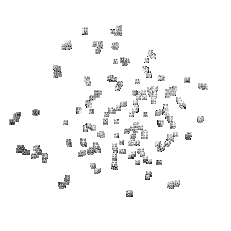

In [4]:
t_sne()

In [5]:
def t_sne_only():
    tsne = TSNE(n_components=2,verbose=1, perplexity=7,init='random',learning_rate=200,n_iter=1000)


    X_embedded = tsne.fit_transform(X)

    ax = plt.gca()
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)

    plt.gray()
    for i in range(400):
        plt.imshow(I[i],extent=(X_embedded[i][0]-1.5,X_embedded[i][0]+1.5,X_embedded[i][1]-1.5,X_embedded[i][1]+1.5),interpolation='none', cmap='gray')
    plt.grid(None)
    plt.axis('off')
    plt.savefig('t_sne_only.png',dpi=300)
    plt.show()

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.226792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.292847
[t-SNE] KL divergence after 1000 iterations: 0.525933


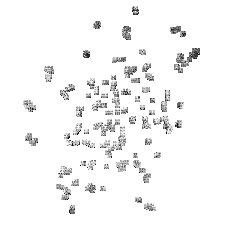

In [6]:
t_sne_only()

In [7]:
def pca():
    s = StandardScaler().fit_transform(X)


    pca = PCA(n_components=2)
    X_embedded = pca.fit_transform(s)
    
    ax = plt.gca()
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)

    plt.gray()
    for i in range(400):
        plt.imshow(I[i],extent=(X_embedded[i][0]-1.5,X_embedded[i][0]+1.5,X_embedded[i][1]-1.5,X_embedded[i][1]+1.5),interpolation='none', cmap='gray')
    plt.grid(None)
    plt.axis('off')
    plt.savefig('pca.png',dpi=300)
    plt.show()

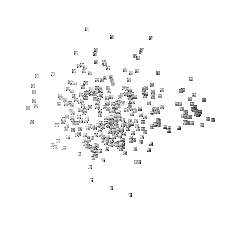

In [8]:
pca()

In [9]:
def UMAP_function():
    ax = plt.gca()
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 15)

    plt.gray()
    #palette = sns.color_palette("bright", 40)
    
    model = UMAP(n_neighbors = 15, min_dist = 0.25, n_components = 2, verbose = True)
    umap = model.fit_transform(X)
    print(umap.shape)

    for i in range(400):
        plt.imshow(I[i],extent=(umap[i][0]-0.1,umap[i][0]+0.1,umap[i][1]-0.1,umap[i][1]+0.1),interpolation='none', cmap='gray')
    #sns.scatterplot(umap[:,0], umap[:,1], hue=y, legend= 0, palette=palette)    #plt.title('UMAP', fontsize = 20)
    #plt.xlabel("UMAP1", fontsize = 20)
    #plt.ylabel("UMAP2", fontsize = 20)
    plt.grid(None)
    plt.axis('off')
    #plt.savefig('umap.png',dpi=300)
    plt.show()

UMAP(min_dist=0.25, verbose=True)
Mon Dec  6 14:44:41 2021 Construct fuzzy simplicial set
Mon Dec  6 14:44:42 2021 Finding Nearest Neighbors
Mon Dec  6 14:44:44 2021 Finished Nearest Neighbor Search
Mon Dec  6 14:44:47 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Dec  6 14:44:49 2021 Finished embedding
(400, 2)


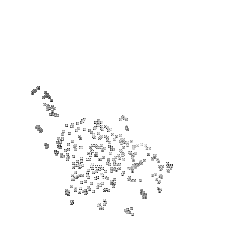

In [10]:
UMAP_function()

In [11]:
def LDA_function():
    sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    ax = plt.gca()
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)

    plt.gray()
    
    for i in range(400):
        plt.imshow(I[i], extent=(X_lda_sklearn[i][0]-0.5 ,X_lda_sklearn[i][0]+0.5,X_lda_sklearn[i][1]-0.5,X_lda_sklearn[i][1]+0.5),interpolation='none', cmap='gray')
    plt.grid(None)
    plt.axis('off')
    plt.savefig('lda.png',dpi=300)
    plt.show()

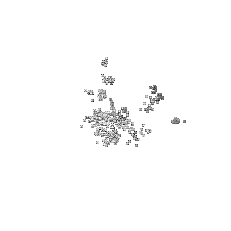

In [12]:
LDA_function()